In [119]:
## Load packages
library(igraph)
library(readr)
library(dplyr)
library(networkD3)
# library(gganimate)
library(gapminder)
library(ggplot2)
library(circlize)
options(repr.plot.width=6, repr.plot.height=6)

In [3]:
df <- read_csv("Auditions.db.comp.csv", locale = locale(encoding = "ISO-8859-1"))
head(df)




-- Column specification ------------------------------------------------------------------------------------------------
cols(
  Name = col_character(),
  n_poste = col_double(),
  Level = col_character(),
  Section = col_character(),
  Role = col_character(),
  status = col_character(),
  year = col_double(),
  institutions = col_character(),
  ID = col_character(),
  X = col_logical(),
  X.1 = col_logical(),
  Id.author.no = col_character()
)



Name,n_poste,Level,Section,Role,status,year,institutions,ID,X,X.1,Id.author.no
Philippe DESSUS,193,PR,NA,NA,interne,2017,NA,80526470,NA,NA,NA
A Belhadjin,20,NA,NA,NA,interne,2020,CY Cergy Paris Université,11317022X,NA,NA,NA
A Bretegnier,62,NA,NA,NA,externe,2020,NA,70549923,NA,NA,NA
A evin,4279,NA,NA,NA,externe,2020,NA,159017920,NA,NA,NA
A Gombert,4647,NA,NA,NA,externe,2020,NA,6993696X,NA,NA,NA
A Kuzniak,4314,PR,7,NA,interne,2017,Paris 7,35587865,NA,NA,NA


In [4]:
interne = df %>% filter(status == 'interne')
externe = df %>% filter(status == 'externe')

interne_2017 = df %>% filter(status == 'interne' & year == 2017)
externe_2017 = df %>% filter(status == 'externe' & year == 2017)

interne_2018 = df %>% filter(status == 'interne' & year == 2018)
externe_2018 = df %>% filter(status == 'externe' & year == 2018)

interne_2019 = df %>% filter(status == 'interne' & year == 2019)
externe_2019 = df %>% filter(status == 'externe' & year == 2019)

interne_2020 = df %>% filter(status == 'interne' & year == 2020)
externe_2020 = df %>% filter(status == 'externe' & year == 2020)

interne_2017_2 = interne_2017 %>% select(n_poste, ID)
head(interne_2017_2)



n_poste,ID
193,80526470
4314,35587865
4314,NA
54,130387304
193,NA
4380,7957047X


# Basic multipartites by years

Warning message in graph_from_data_frame(interne_2017_2, directed = FALSE):
"In `d' `NA' elements were replaced with string "NA""

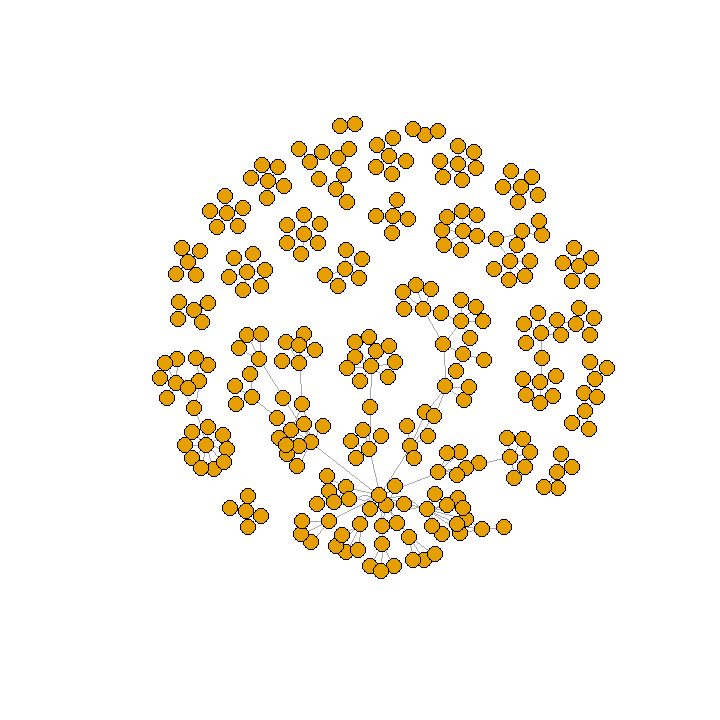

In [5]:
set.seed(123)
graph_interne_2017 <- graph_from_data_frame(interne_2017_2, directed = FALSE)
V(graph_interne_2017)$label <- V(graph_interne_2017)$name # set labels.
plot(graph_interne_2017, vertex.label = NA, vertex.size = 7)



In [6]:
externe_2017_2 = externe_2017 %>% select(n_poste, ID)
head(externe_2017_2)



n_poste,ID
4283,82292477
544,156891824
4061,28820649
4372,28820649
4265,135608104
901,35326727


Warning message in graph_from_data_frame(externe_2017_2, directed = FALSE):
"In `d' `NA' elements were replaced with string "NA""

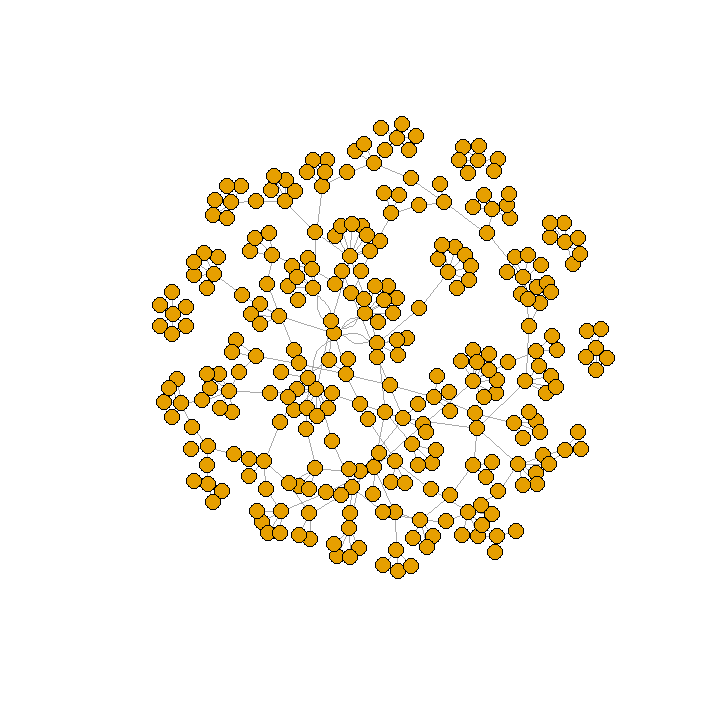

In [7]:
graph_externe_2017 <- graph_from_data_frame(externe_2017_2, directed = FALSE)
V(graph_externe_2017)$label <- V(graph_externe_2017)$name # set labels.
plot(graph_externe_2017, vertex.label = NA, vertex.size = 7)



In [8]:
interne_2018_2 = interne_2018 %>% select(n_poste, ID)
head(interne_2018_2)



n_poste,ID
4191,3376199X
4551,103593462
4551,103593462
4438,195926226
43,12146489X
4410,119644312


Warning message in graph_from_data_frame(interne_2018_2, directed = FALSE):
"In `d' `NA' elements were replaced with string "NA""

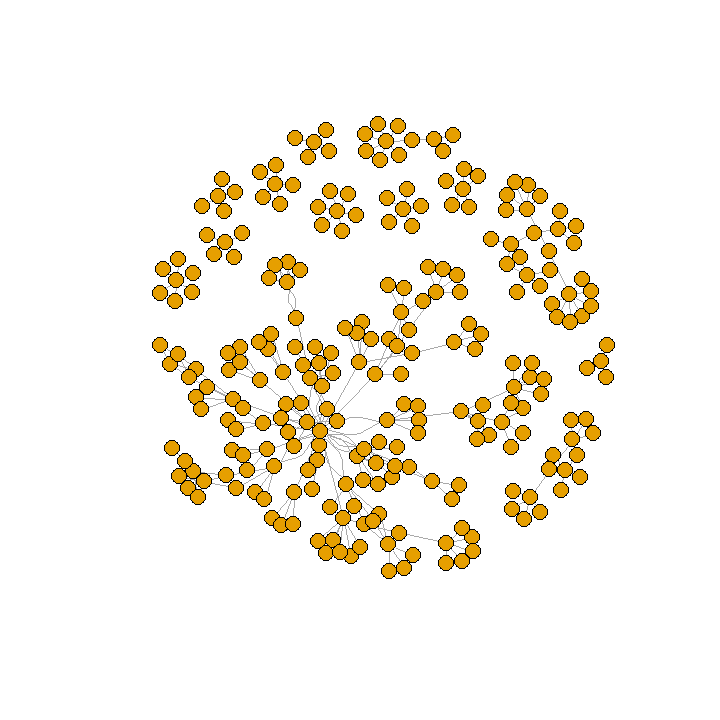

In [9]:
graph_interne_2018 <- graph_from_data_frame(interne_2018_2, directed = FALSE)
V(graph_interne_2018)$label <- V(graph_interne_2018)$name # set labels.
plot(graph_interne_2018, vertex.label = NA, vertex.size = 7)



In [10]:
externe_2018_2 = externe_2018 %>% select(n_poste, ID)
head(externe_2018_2)



n_poste,ID
645,30023459
4559,30023459
4410,34223940
4063,28820649
4303,28820649
645,148123007


Warning message in graph_from_data_frame(externe_2018_2, directed = FALSE):
"In `d' `NA' elements were replaced with string "NA""

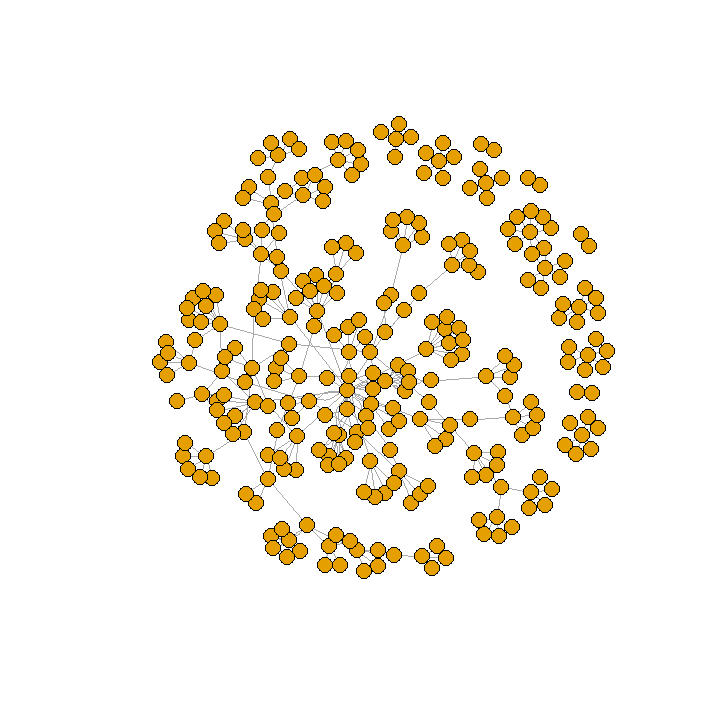

In [11]:
graph_externe_2018 <- graph_from_data_frame(externe_2018_2, directed = FALSE)
V(graph_externe_2018)$label <- V(graph_externe_2018)$name # set labels.
plot(graph_externe_2018, vertex.label = NA, vertex.size = 7)


In [12]:

interne_2019_2 = interne_2019 %>% select(n_poste, ID)
head(interne_2019_2)


n_poste,ID
4591,110135679
56,82292477
748,158187547
4254,100503756
4639,NA
4639,NA


Warning message in graph_from_data_frame(interne_2019_2, directed = FALSE):
"In `d' `NA' elements were replaced with string "NA""Warning message in length(vattrs[[name]]) <- vc:
"length of NULL cannot be changed"

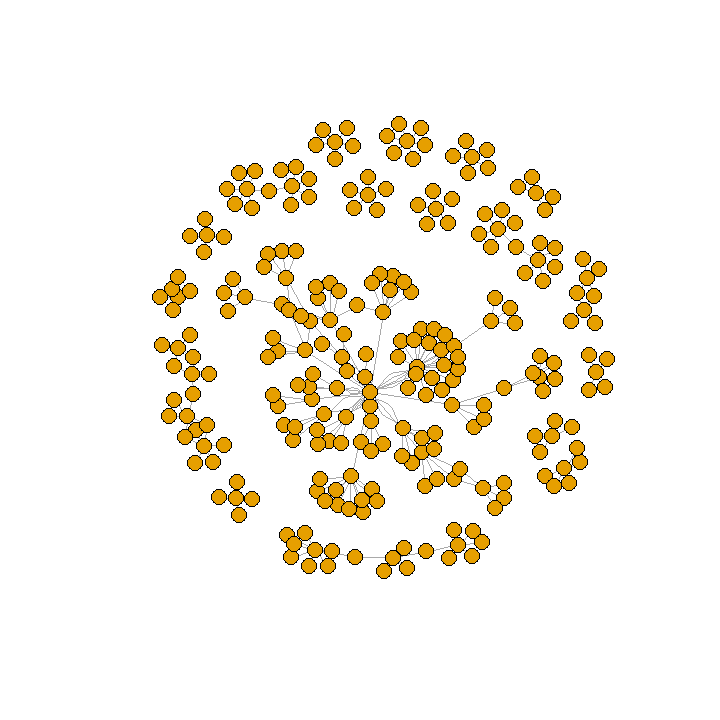

In [122]:

graph_interne_2019 <- graph_from_data_frame(interne_2019_2, directed = FALSE)
V(graph_interne_2019)$color <- ifelse(V(graph_interne_2019)$type, "lightblue", "yellow")
V(graph_interne_2019)$label <- V(graph_interne_2019)$name # set labels.
plot(graph_interne_2019, vertex.label = NA, vertex.size = 7)


Warning message in graph.data.frame(interne_2019_2, directed = FALSE):
"In `d' `NA' elements were replaced with string "NA""

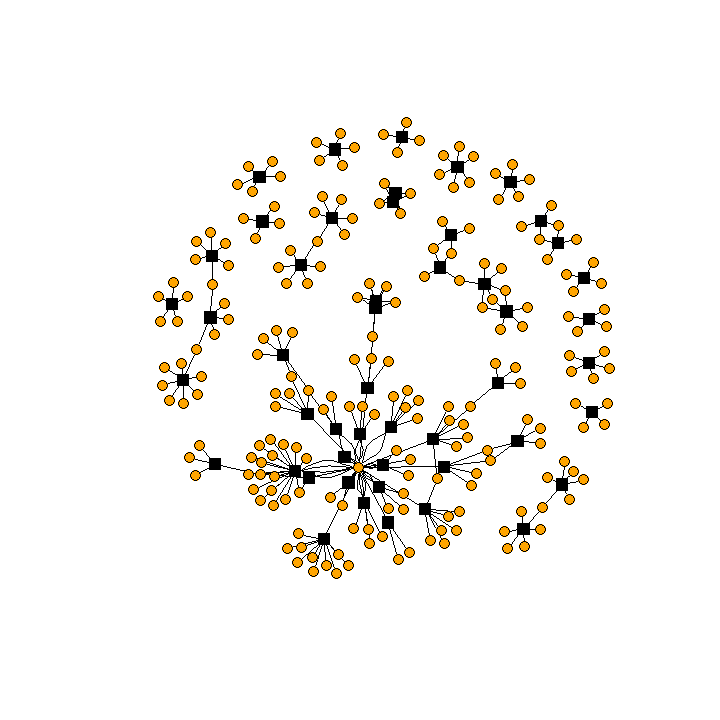

In [132]:
set.seed(20)
e17_g <- graph.data.frame(interne_2019_2, directed=FALSE)
e17_b <- bipartite.mapping(e17_g)
V(e17_g)$type <- bipartite_mapping(e17_g)$type
V(e17_g)$color <- ifelse(V(e17_g)$type, "orange", "black")
V(e17_g)$shape <- ifelse(V(e17_g)$type, "circle", "square")
E(e17_g)$color <- "black"
plot(e17_g,vertex.label = NA, vertex.size =5)

Warning message in graph.data.frame(interne_2020_2, directed = FALSE):
"In `d' `NA' elements were replaced with string "NA""

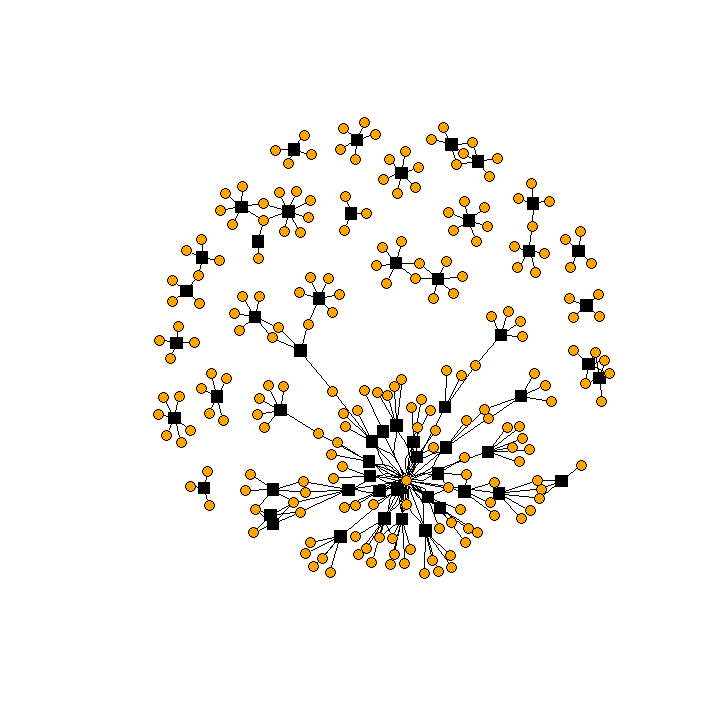

In [131]:
set.seed(20)

e17_g <- graph.data.frame(interne_2020_2, directed=FALSE)
e17_b <- bipartite.mapping(e17_g)
V(e17_g)$type <- bipartite_mapping(e17_g)$type
V(e17_g)$color <- ifelse(V(e17_g)$type, "orange", "black")
V(e17_g)$shape <- ifelse(V(e17_g)$type, "circle", "square")
E(e17_g)$color <- "black"
plot(e17_g,vertex.label = NA, vertex.size =5)

Warning message in graph.data.frame(externe_2019_2, directed = FALSE):
"In `d' `NA' elements were replaced with string "NA""

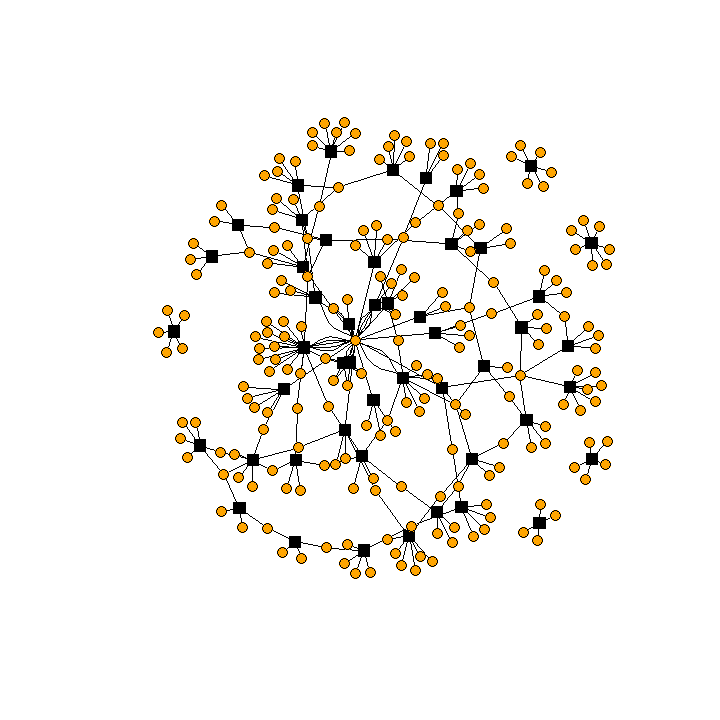

In [127]:
e17_g <- graph.data.frame(externe_2019_2, directed=FALSE)
e17_b <- bipartite.mapping(e17_g)
V(e17_g)$type <- bipartite_mapping(e17_g)$type
V(e17_g)$color <- ifelse(V(e17_g)$type, "orange", "black")
V(e17_g)$shape <- ifelse(V(e17_g)$type, "circle", "square")
E(e17_g)$color <- "black"
plot(e17_g,vertex.label = NA, vertex.size =5)

Warning message in graph.data.frame(externe_2020_2, directed = FALSE):
"In `d' `NA' elements were replaced with string "NA""

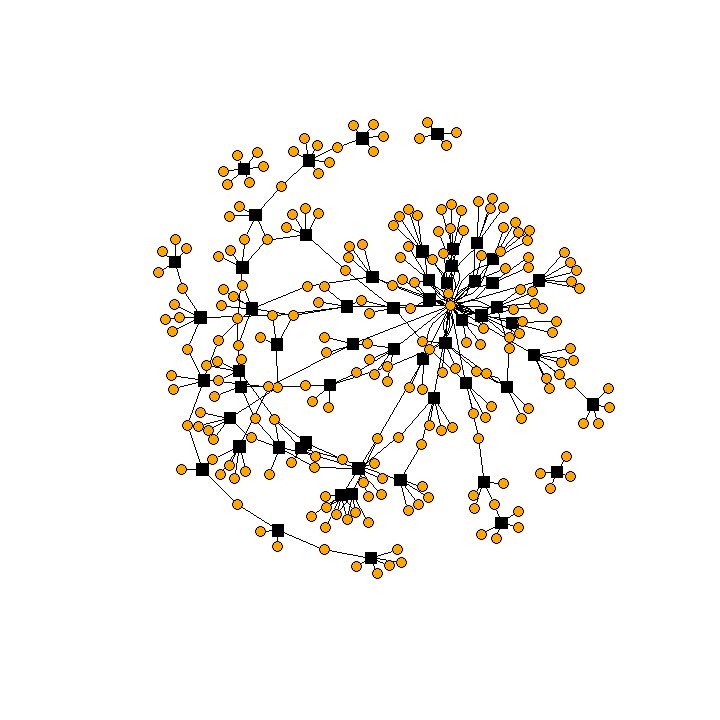

In [128]:
e17_g <- graph.data.frame(externe_2020_2, directed=FALSE)
e17_b <- bipartite.mapping(e17_g)
V(e17_g)$type <- bipartite_mapping(e17_g)$type
V(e17_g)$color <- ifelse(V(e17_g)$type, "orange", "black")
V(e17_g)$shape <- ifelse(V(e17_g)$type, "circle", "square")
E(e17_g)$color <- "black"
plot(e17_g,vertex.label = NA, vertex.size =5)

In [14]:

externe_2019_2 = externe_2019 %>% select(n_poste, ID)
head(externe_2019_2)



n_poste,ID
94,82292477
322,82292477
4376,34223940
4460,NA
381,50726129
1087,50726129


Warning message in graph_from_data_frame(externe_2019_2, directed = FALSE):
"In `d' `NA' elements were replaced with string "NA""

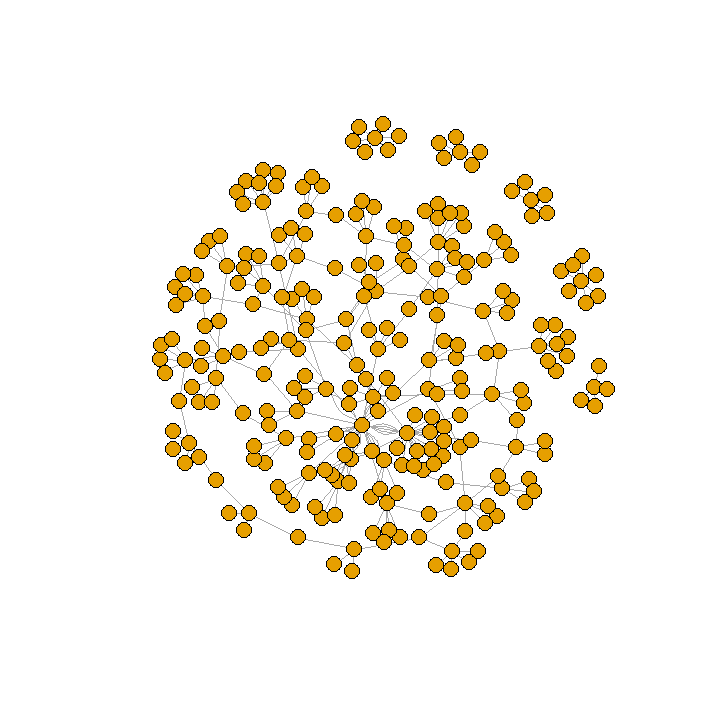

In [15]:
graph_externe_2019 <- graph_from_data_frame(externe_2019_2, directed = FALSE)
V(graph_externe_2019)$label <- V(graph_externe_2019)$name # set labels.
plot(graph_externe_2019, vertex.label = NA, vertex.size = 7)


In [16]:

interne_2020_2 = interne_2020 %>% select(n_poste, ID)
head(interne_2020_2)


n_poste,ID
20,11317022X
4636,194969770
125,82292477
160,82292477
43,34223940
4772,78972485


Warning message in graph_from_data_frame(interne_2020_2, directed = FALSE):
"In `d' `NA' elements were replaced with string "NA""

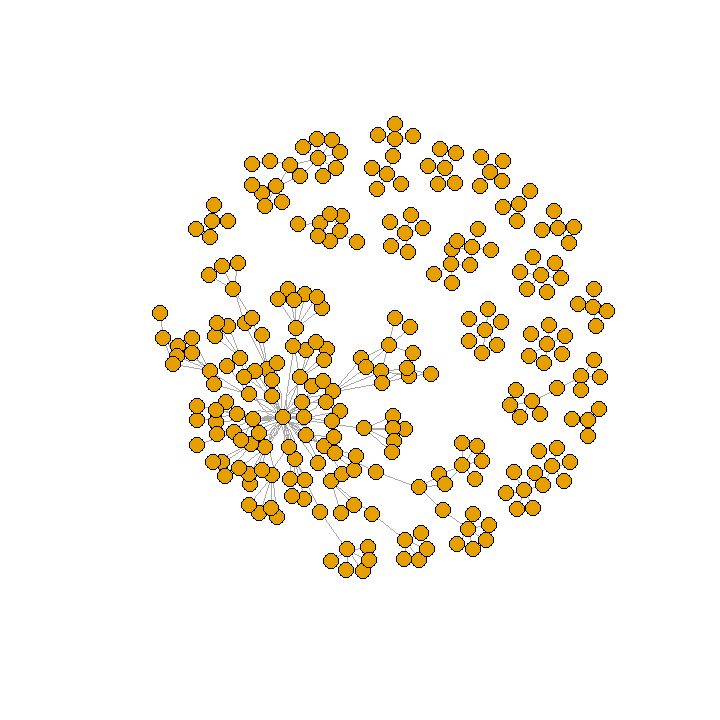

In [17]:

graph_interne_2020 <- graph_from_data_frame(interne_2020_2, directed = FALSE)
V(graph_interne_2020)$label <- V(graph_interne_2020)$name # set labels.
plot(graph_interne_2020, vertex.label = NA, vertex.size = 7)




In [18]:
externe_2020_2 = externe_2020 %>% select(n_poste, ID)
head(externe_2020_2)



n_poste,ID
62,70549923
4279,159017920
4647,6993696X
361,129974641
4647,NA
4543,58920943


Warning message in graph_from_data_frame(externe_2020_2, directed = FALSE):
"In `d' `NA' elements were replaced with string "NA""

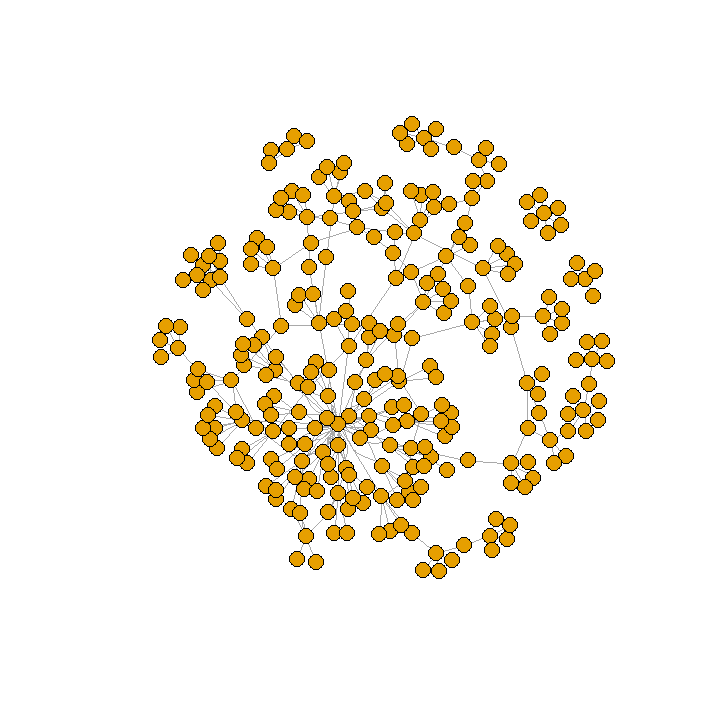

In [19]:
graph_externe_2020 <- graph_from_data_frame(externe_2020_2, directed = FALSE)
V(graph_externe_2020)$label <- V(graph_externe_2020)$name # set labels.
plot(graph_externe_2020, vertex.label = NA, vertex.size = 7)

# All externs graphs

Warning message in graph_from_data_frame(externe_2, directed = FALSE):
"In `d' `NA' elements were replaced with string "NA""

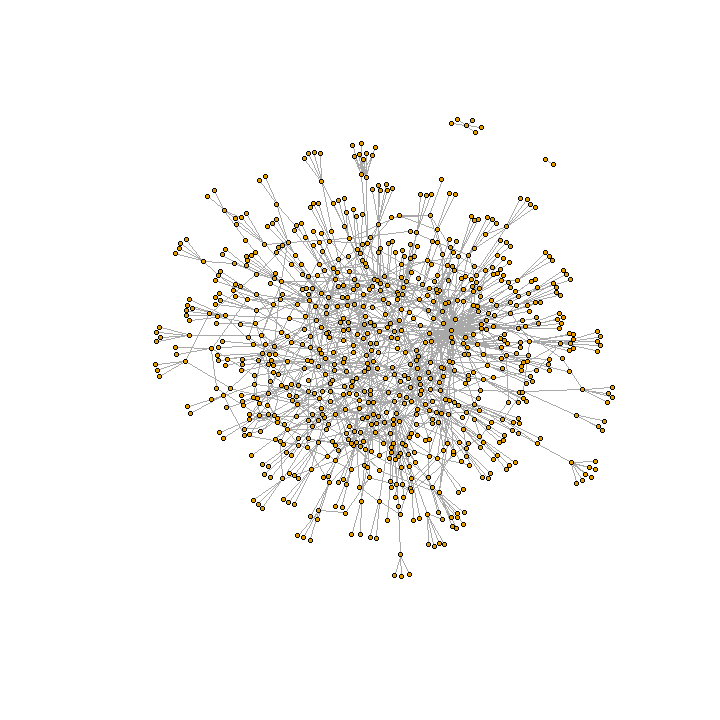

In [20]:

externe_2= externe %>% select(n_poste, ID)

graph_externe <- graph_from_data_frame(externe_2, directed = FALSE)
V(graph_externe)$label <- V(graph_externe)$name # set labels.
plot(graph_externe, vertex.label = NA, vertex.size = 2)

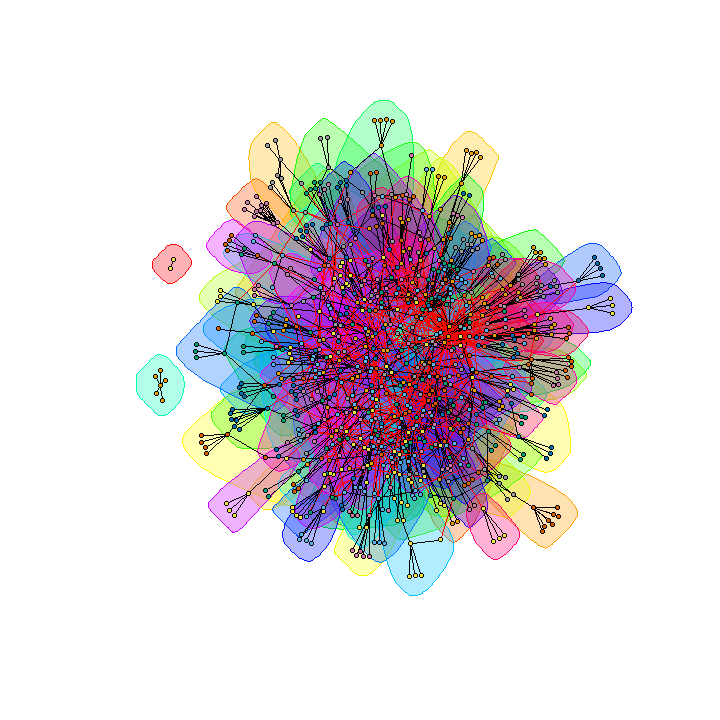

In [21]:
imc_externe <- cluster_infomap(graph_externe)
plot(imc_externe, graph_externe, vertex.label = NA, vertex.size = 2)

# Interactive garphs


In [22]:

# Use igraph to make the graph and find membership
wc <- cluster_walktrap(graph_interne_2017)
members <- membership(wc)
head(wc)


$`1`
 [1] "545"       "570"       "589"       "31984967"  "156924889" "78013992" 
 [7] "92157548"  "34085564"  "77902033"  "59817941"  "75134616"  "59818085" 
[13] "157131696" "8602681X"  "66908671" 

$`2`
 [1] "191"       "192"       "156891824" "71567895"  "121324958" "147807018"
 [7] "31994652"  "67011136"  "79359914"  "115551522"

$`3`
 [1] "4314"      "901"       "4197"      "4198"      "35587865"  "NA"       
 [7] "15212358X" "59941197"  "58477446"  "70561168"  "19683273X" "95210865" 
[13] "61072435"  "80560563"  "73368202"  "123622352" "59427183"  "69094586" 

$`4`
 [1] "4380"      "4361"      "7957047X"  "2858435X"  "60459085"  "13329434X"
 [7] "35446331"  "35059087"  "34748679"  "71470077"  "136699839"

$`5`
 [1] "4284"      "4286"      "50284150"  "35094478"  "129783838" "81784805" 
 [7] "87519909"  "157447596" "84598425"  "138784434"

$`6`
 [1] "4421"      "4420"      "92460003"  "73460907"  "50245651"  "33335273" 
 [7] "29083745"  "96283653"  "67729029"  "13608043X"

In [23]:
head(members)



193 4314   54 4380 4361 4284 
  13    3   34    4    4    5

In [24]:
# Convert to object suitable for networkD3
graph_interne_2017_d3 <- igraph_to_networkD3(graph_interne_2017, group = members)
head(graph_interne_2017_d3$links)

source,target
52,258
9,96
26,80
35,271
15,65
37,155


In [25]:
# Convert to object suitable for networkD3
graph_interne_2017_d3 <- igraph_to_networkD3(graph_interne_2017, group = members)
head(graph_interne_2017_d3$nodes)

name,group
193,13
4314,3
54,34
4380,4
4361,4
4284,5


In [26]:
# Create force directed network plot
forceNetwork(
Links = graph_interne_2017_d3$links,
Nodes = graph_interne_2017_d3$nodes,
Source = 'source',
Target = 'target',
NodeID = 'name',
Group = 'group'
)

HTML widgets cannot be represented in plain text (need html)

In [27]:
#edgelist
externe_2017_edge_list <- externe_2017 %>% select(n_poste, ID) %>%
  inner_join(., select(., n_poste, ID), by = "n_poste") %>%
  rename(ID1 = ID.x, ID2 = ID.y) %>%
  filter(ID1 != ID2) %>%
  unique %>%
  arrange(n_poste)

head(externe_2017_edge_list)



n_poste,ID1,ID2
13,90444590,112729851
13,90444590,143374885
13,90444590,122818709
13,90444590,136684459
13,90444590,89759567
13,112729851,90444590


In [28]:
# Plot
simpleNetwork(externe_2017_edge_list[c('ID1', 'ID2')])
# saveNetwork(file = 'externe_2017_edge_list_id.html')

HTML widgets cannot be represented in plain text (need html)

In [29]:
externe_2017_edge_list_name <- externe_2017 %>% select(Level, n_poste, Name) %>%
  inner_join(., select(., n_poste, Name), by = "n_poste") %>%
  rename(Name1 = Name.x, Name2 = Name.y) %>%
  filter(Name1 != Name2) %>%
  unique %>%
  arrange(n_poste)

head(externe_2017_edge_list_name)

Level,n_poste,Name1,Name2
MCF,13,Caroline DESOMBRE,Claire PERRIN
MCF,13,Caroline DESOMBRE,Cyril CROZET
MCF,13,Caroline DESOMBRE,Dominique BERGER
MCF,13,Caroline DESOMBRE,Jeanine POMMIER
MCF,13,Caroline DESOMBRE,Thierry PIOT
MCF,13,Claire PERRIN,Caroline DESOMBRE


# Basic edgelist graph

In [30]:

# Plot
simpleNetwork(externe_2017_edge_list_name[c('Name1', 'Name2')])  %>%
saveNetwork(file = 'externe_2017_edge_list_name.html')


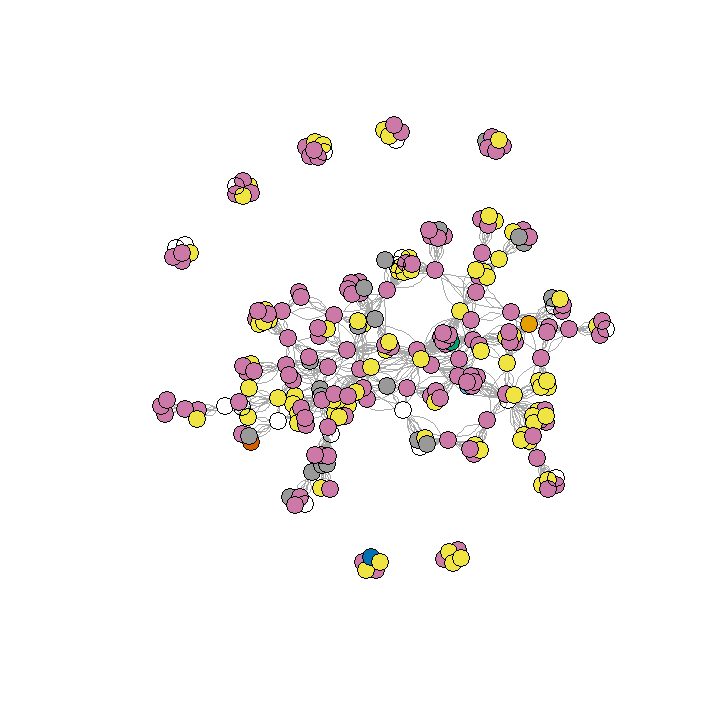

In [31]:

externe_2017_matrix_name <- as.matrix(externe_2017_edge_list_name[c('Name1', 'Name2')]) 

externe_2017$Level <- as.factor(externe_2017$Level)
graph_2017 <- graph_from_edgelist(externe_2017_matrix_name, directed = FALSE)
plot(graph_2017,
     vertex.label = NA, vertex.size = 8, vertex.color = externe_2017$Level)


# Community detection

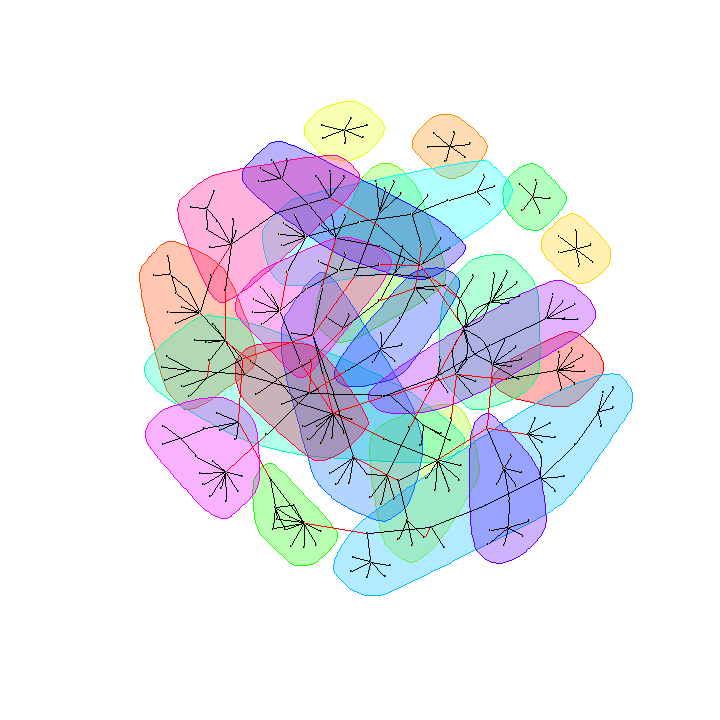

In [32]:

# Community Detection ----------------------------------------------------
# Louvain
lc_externe_2017 <- cluster_louvain(graph_externe_2017)
plot(lc_externe_2017, graph_externe_2017, vertex.label = NA, vertex.size = 1)


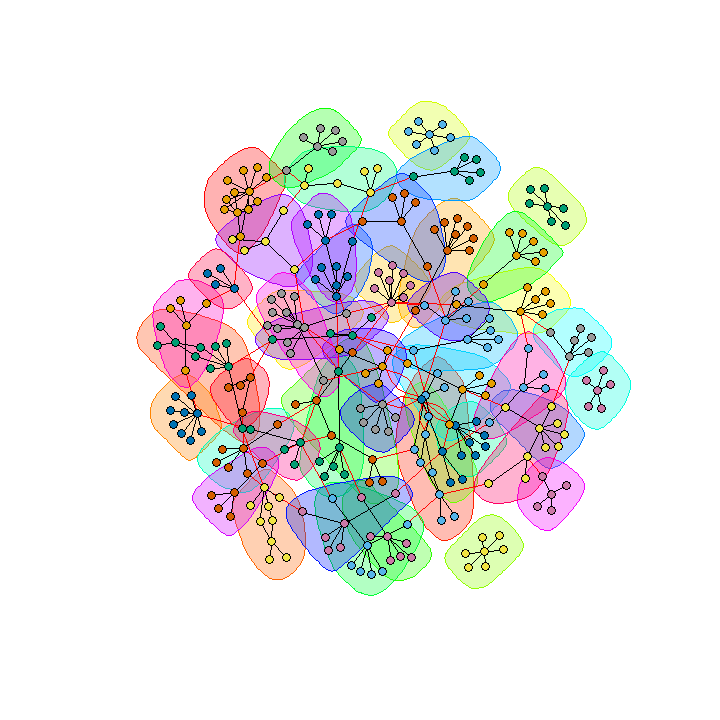

In [33]:
# Community Detection ----------------------------------------------------
# Infomap
imc_externe <- cluster_infomap(graph_externe_2017)
plot(imc_externe, graph_externe_2017, vertex.label = NA, vertex.size = 4)


### community detection on int/extertnals 2019

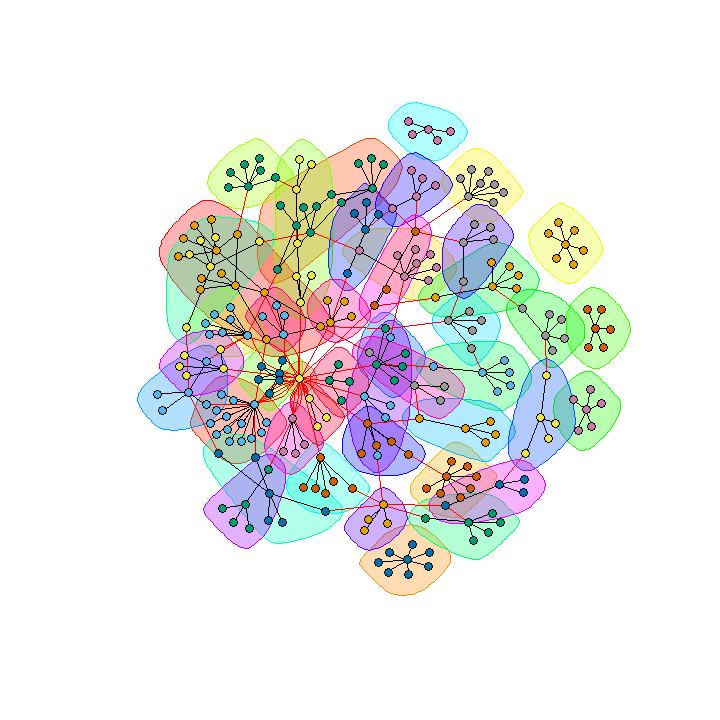

In [83]:
# Community Detection externals 2019
# Infomap

imc_externe <- cluster_infomap(graph_externe_2019)
plot(imc_externe, graph_externe_2019, vertex.label = NA, vertex.size = 4)

In [85]:
length(communities(imc_externe))


[1] 44

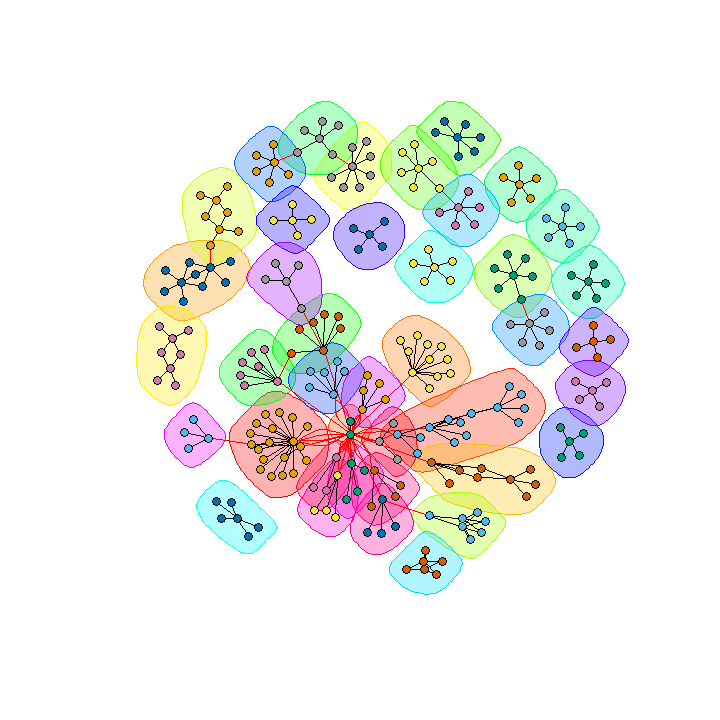

In [74]:
# Community Detection externals 2019
# Infomap

imc_interne <- cluster_infomap(graph_interne_2019)
plot(imc_interne, graph_interne_2019, vertex.label = NA, vertex.size = 4)

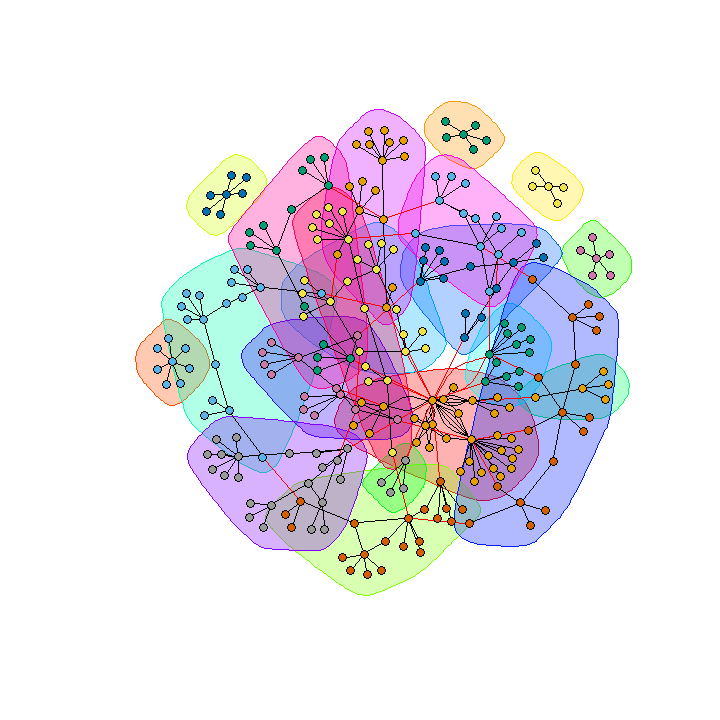

In [86]:
imc_interne <- cluster_louvain(graph_externe_2019)
plot(imc_interne, graph_externe_2019, vertex.label = NA, vertex.size = 4)

In [89]:
length(communities(imc_externe))


[1] 44

### community detection on int/extertnals 2020

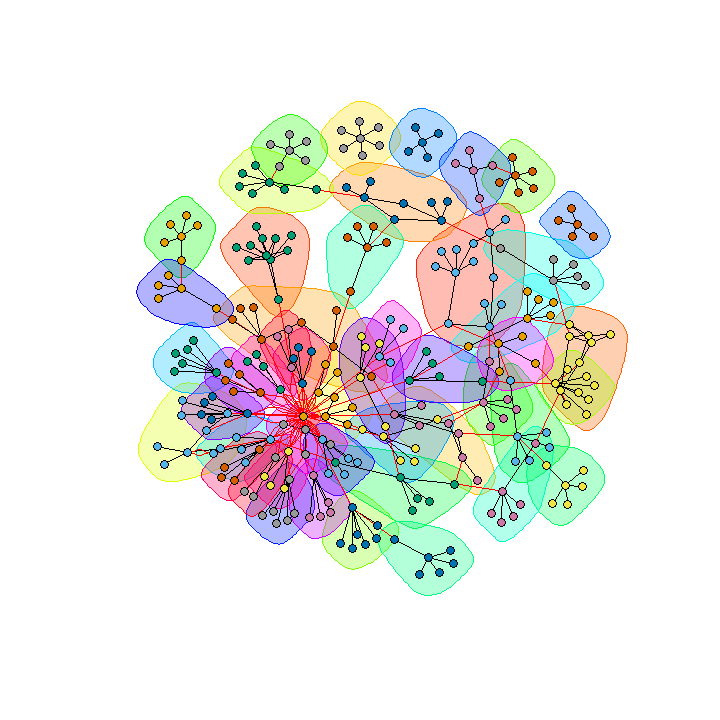

In [103]:
# Community Detection externals 2020
# Infomap

imc_externe <- cluster_infomap(graph_externe_2020)
plot(imc_externe, graph_externe_2020, vertex.label = NA, vertex.size = 4)

In [104]:
length(communities(imc_externe))


[1] 48

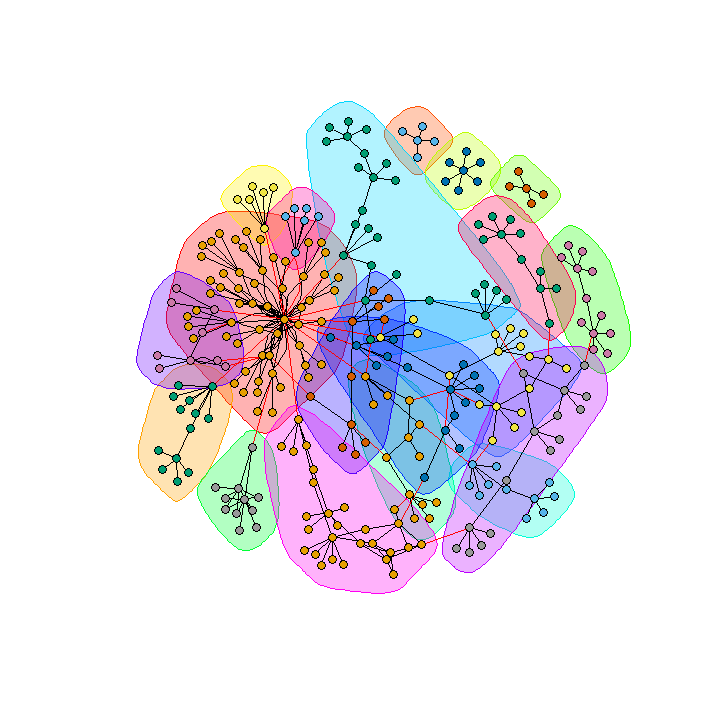

In [105]:
imc_externe <- cluster_louvain(graph_externe_2020)
plot(imc_externe, graph_externe_2020, vertex.label = NA, vertex.size = 4)

In [106]:
length(communities(imc_externe))


[1] 19

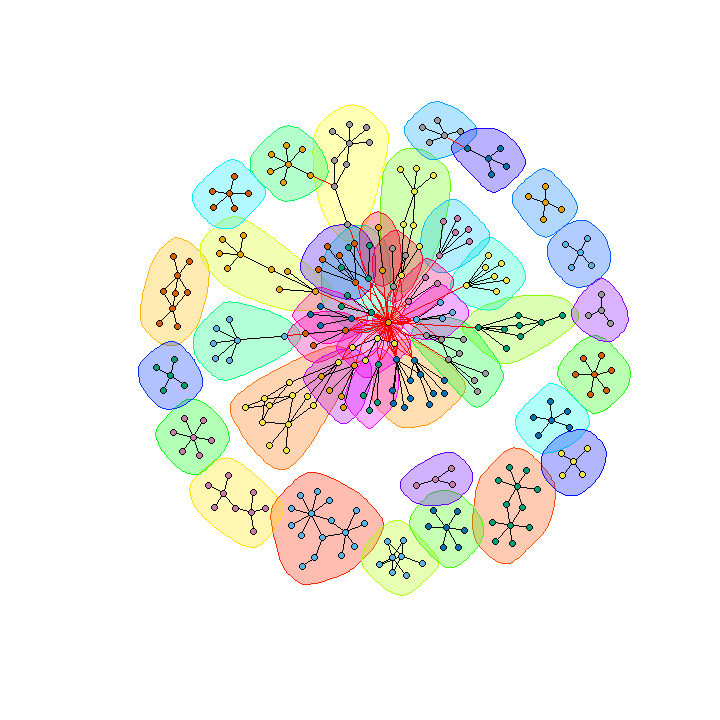

In [37]:
# Community Detection internals 2020
# Infomap
set.seed(20)
imc_interne <- cluster_infomap(graph_interne_2020)
plot(imc_interne, graph_interne_2020, vertex.label = NA, vertex.size = 3)

In [38]:

externe_edge_list_name <- externe %>% select(n_poste, Name) %>%
  inner_join(., select(., n_poste, Name), by = "n_poste") %>%
  rename(Name1 = Name.x, Name2 = Name.y) %>%
  filter(Name1 != Name2) %>%
  unique %>%
  arrange(n_poste)

head(externe_edge_list_name)


n_poste,Name1,Name2
13,Caroline DESOMBRE,Claire PERRIN
13,Caroline DESOMBRE,Cyril CROZET
13,Caroline DESOMBRE,Dominique BERGER
13,Caroline DESOMBRE,Jeanine POMMIER
13,Caroline DESOMBRE,Thierry PIOT
13,Claire PERRIN,Caroline DESOMBRE


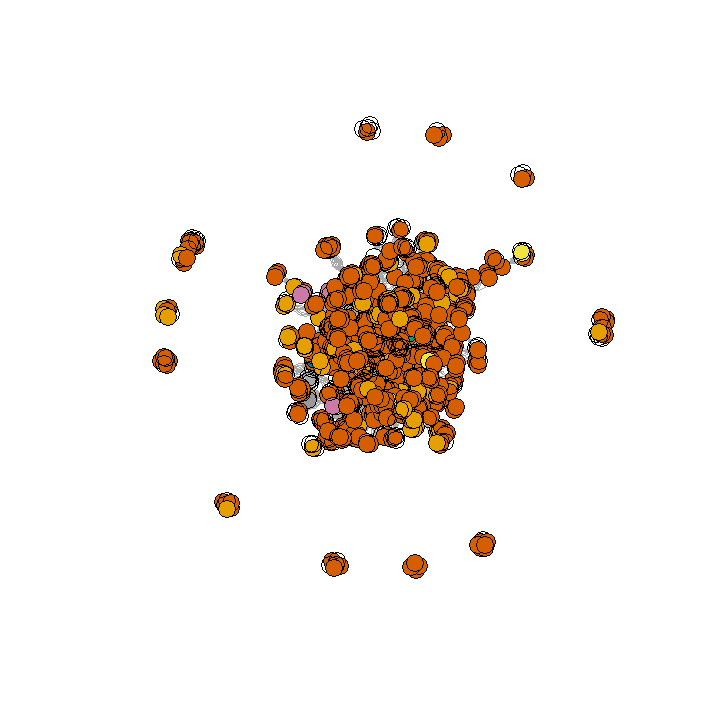

In [39]:

externe_matrix_name <- as.matrix(externe_edge_list_name[c('Name1', 'Name2')]) 

externe$Level <- as.factor(externe$Level)
graph_externe <- graph_from_edgelist(externe_matrix_name, directed = FALSE)
plot(graph_externe, vertex.label = NA, vertex.size = 8, vertex.color = externe$Level)



In [40]:
interne_2017_edge_list_name <- interne_2017 %>% select(Level, n_poste, Name) %>%
  inner_join(., select(., n_poste, Name), by = "n_poste") %>%
  rename(Name1 = Name.x, Name2 = Name.y) %>%
  filter(Name1 != Name2) %>%
  unique %>%
  arrange(n_poste)

head(interne_2017_edge_list_name)



Level,n_poste,Name1,Name2
PU,13,Ludovic MORGE,Marc DAGUZON
PU,13,Ludovic MORGE,Marie-Christine TOCZEK-CAPELLE
PU,13,Ludovic MORGE,Nathalie GAL-PETITFAUX
MCF,13,Marc DAGUZON,Ludovic MORGE
MCF,13,Marc DAGUZON,Marie-Christine TOCZEK-CAPELLE
MCF,13,Marc DAGUZON,Nathalie GAL-PETITFAUX


In [41]:
# Plot
simpleNetwork(interne_2017_edge_list_name[c('Name1', 'Name2')])  %>%
saveNetwork(file = 'interne_2017_edge_list_name.html')



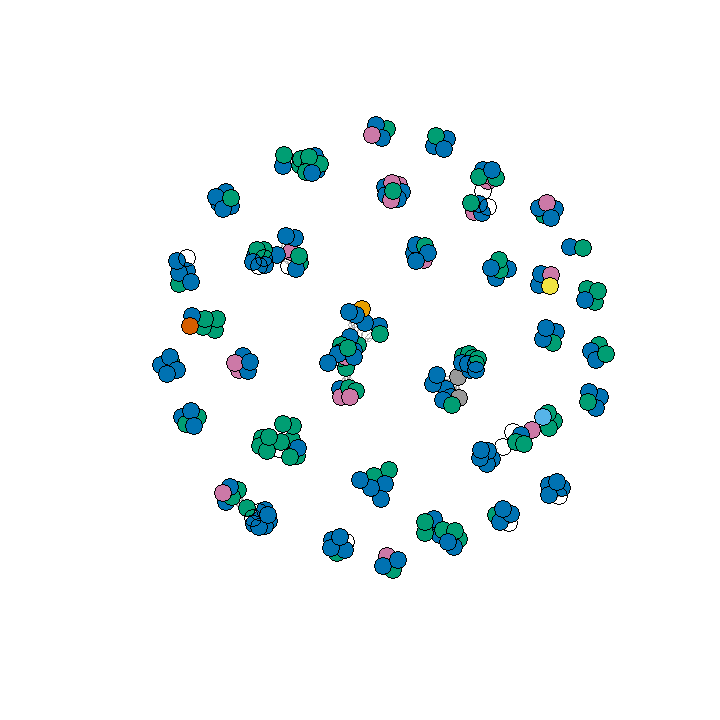

In [42]:
interne_2017_matrix_name <- as.matrix(interne_2017_edge_list_name[c('Name1', 'Name2')]) 
interne_2017$Level <- as.factor(interne_2017$Level)
graph_2017 <- graph_from_edgelist(interne_2017_matrix_name, directed = FALSE)
plot(graph_2017,
     vertex.label = NA, vertex.size = 8, vertex.color = interne_2017$Level)



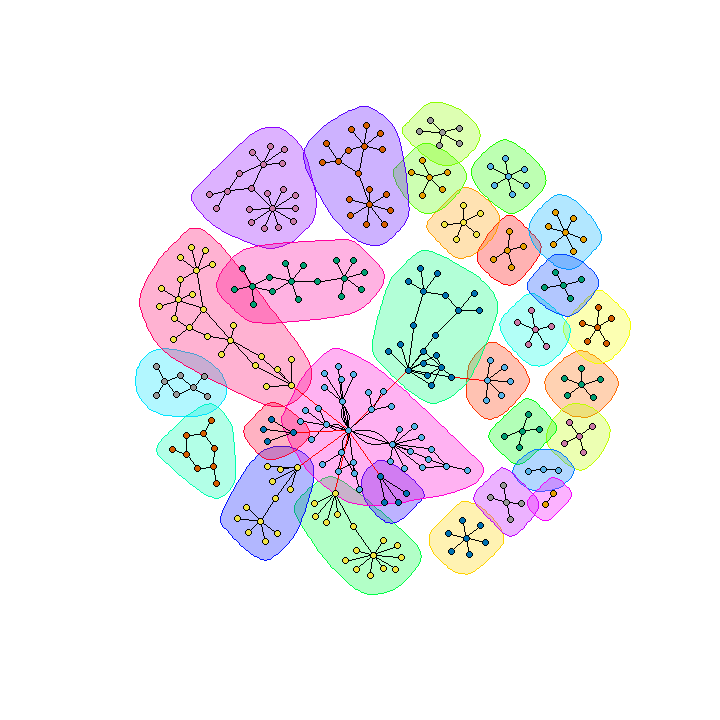

In [43]:
# Community Detection ----------------------------------------------------
# Louvain
lc_interne_2017 <- cluster_louvain(graph_interne_2017)
plot(lc_interne_2017, graph_interne_2017, vertex.label = NA, vertex.size = 3)



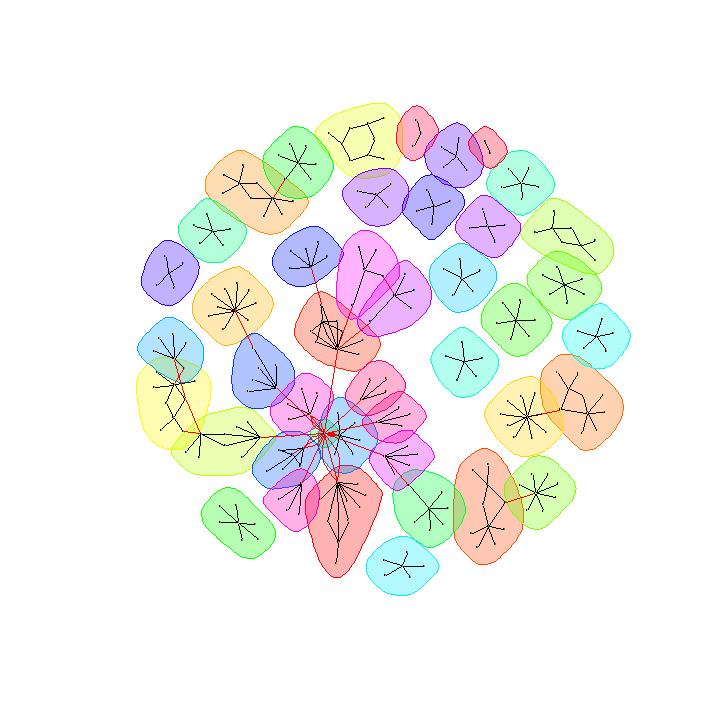

In [118]:
# Community Detection ----------------------------------------------------
# Infomap
imc_interne_2017 <- cluster_infomap(graph_interne_2017)
# membership(imc_interne_2017)
# communities(imc_interne_2017)
plot(imc_interne_2017, graph_interne_2017, vertex.label = NA, vertex.size = 1)



In [45]:
interne_edge_list_name <- interne %>% select(Level, n_poste, Name) %>%
  inner_join(., select(., n_poste, Name), by = "n_poste") %>%
  rename(Name1 = Name.x, Name2 = Name.y) %>%
  filter(Name1 != Name2) %>%
  unique %>%
  arrange(n_poste)

head(interne_edge_list_name)



Level,n_poste,Name1,Name2
PU,13,Ludovic MORGE,Marc DAGUZON
PU,13,Ludovic MORGE,Marie-Christine TOCZEK-CAPELLE
PU,13,Ludovic MORGE,Nathalie GAL-PETITFAUX
MCF,13,Marc DAGUZON,Ludovic MORGE
MCF,13,Marc DAGUZON,Marie-Christine TOCZEK-CAPELLE
MCF,13,Marc DAGUZON,Nathalie GAL-PETITFAUX


In [46]:
# Plot
simpleNetwork(interne_edge_list_name[c('Name1', 'Name2')])  %>%
saveNetwork(file = 'interne_edge_list_name.html')



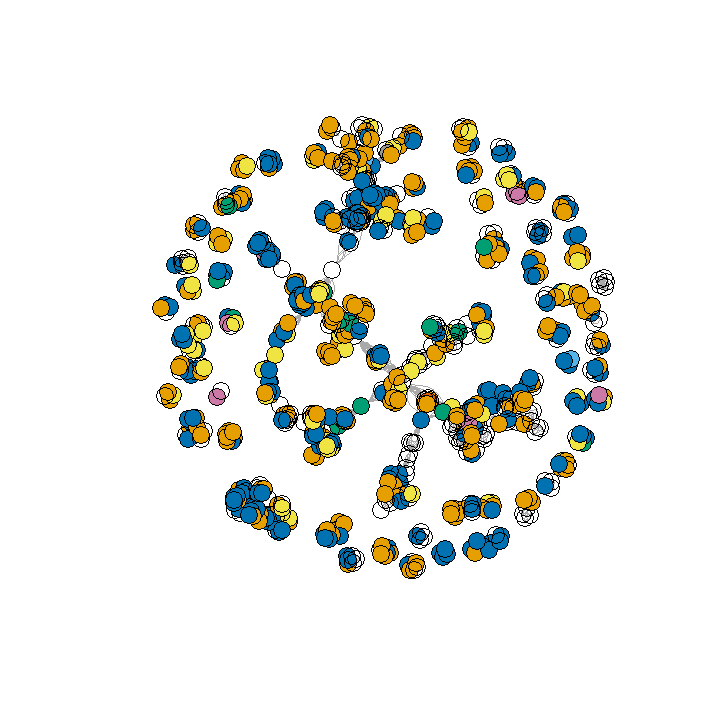

In [47]:
interne_matrix_name <- as.matrix(interne_edge_list_name[c('Name1', 'Name2')]) 

interne$Level <- as.factor(interne$Level)
graph_interne <- graph_from_edgelist(interne_matrix_name, directed = FALSE)
V(graph_interne)$betweenness <- betweenness(graph_interne)
plot(graph_interne,
     vertex.label = NA, vertex.size = 8, vertex.color = interne$Level)



In [48]:
# Community Detection ----------------------------------------------------
# Louvain
lc_interne <- cluster_louvain(graph_interne)


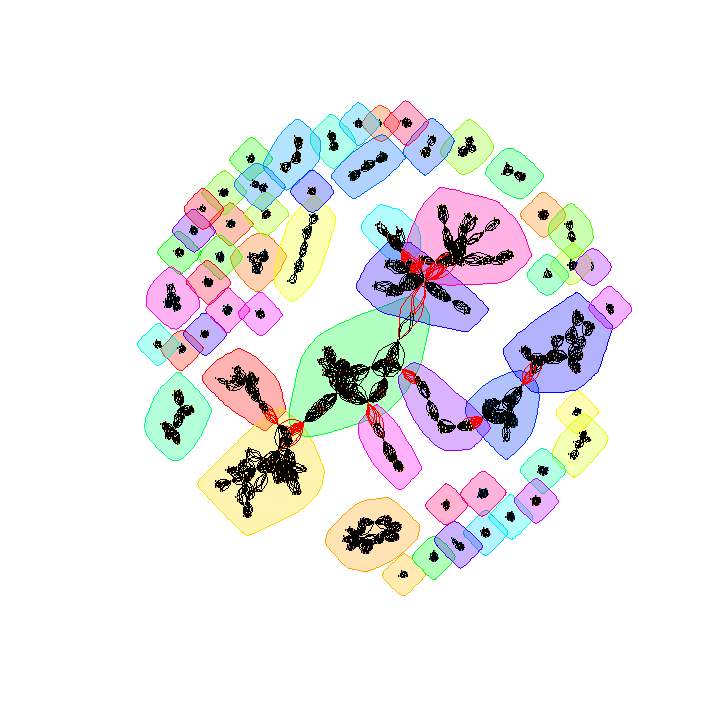

In [49]:
plot(lc_interne, graph_interne, vertex.label = NA, vertex.size = 1)


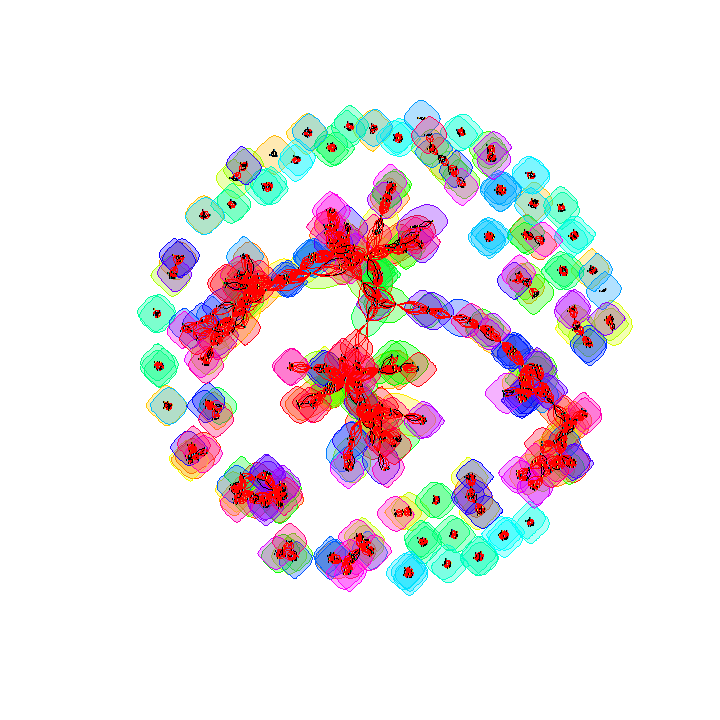

In [50]:
# Community Detection ----------------------------------------------------
# Infomap
imc_interne <- cluster_infomap(graph_interne)
plot(imc_interne, graph_interne, vertex.label = NA, vertex.size = 1)



In [51]:

interne_2017_betweenness <- as.data.frame(betweenness(graph_interne_2017))
colnames(interne_2017_betweenness) <- c("betweenness")
interne_2017_betweenness <- interne_2017_betweenness %>% arrange(desc(betweenness))
head(interne_2017_betweenness)


,betweenness
NA,6112.000
193,2554.000
543,2271.500
544,1770.233
4306,1610.000
77902033,1262.133


In [52]:
interne_2017_strength <- as.data.frame(strength(graph_interne_2017))
colnames(interne_2017_strength) <- c("strength")
interne_2017_strength <- interne_2017_strength %>% arrange(desc(strength))
head(interne_2017_strength)

,strength
NA,21
4403,12
193,11
4314,10
4409,10
4305,10


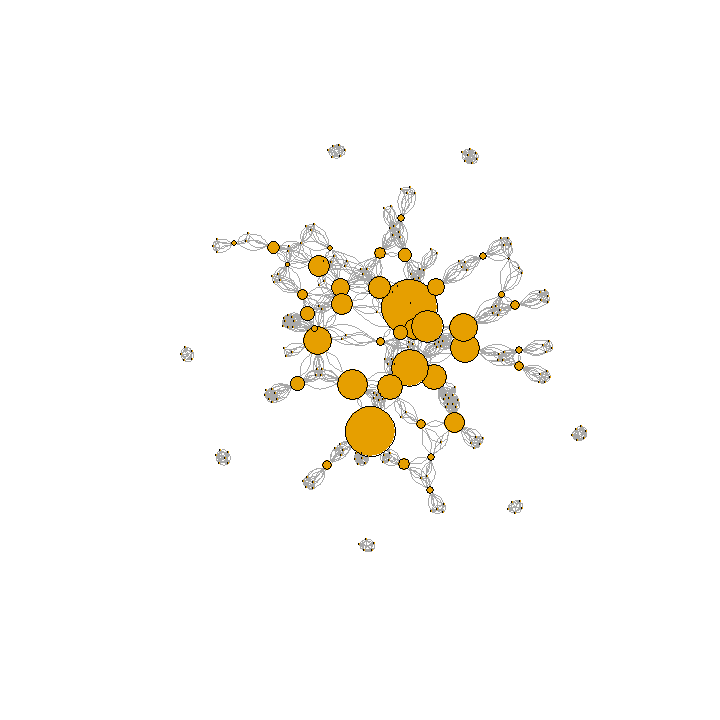

In [53]:
externe_2017_matrix_name <- as.matrix(externe_2017_edge_list_name[c('Name1', 'Name2')]) 
graph_2017 <- graph_from_edgelist(externe_2017_matrix_name, directed = FALSE)
plot(graph_2017,vertex.label = NA, vertex.size = betweenness(graph_2017)*0.005)

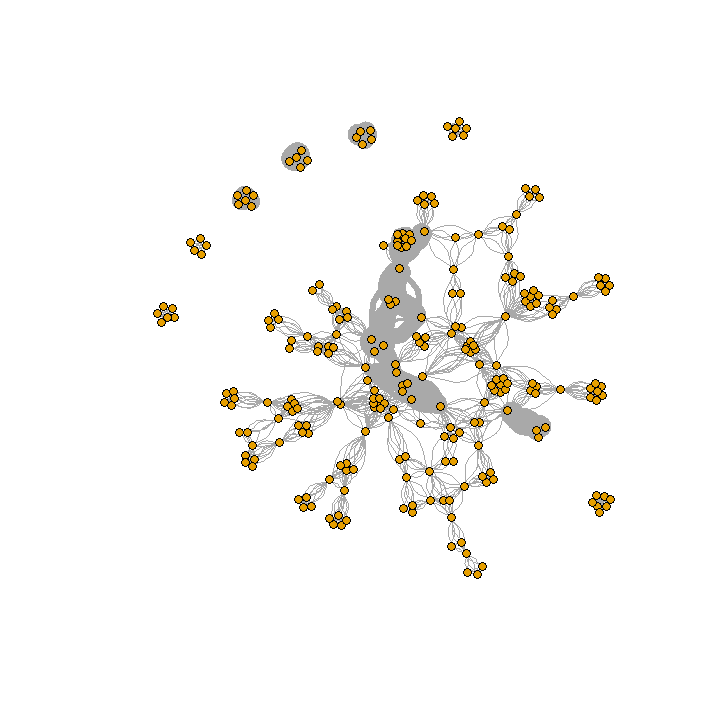

In [54]:
externe_2017_matrix_name <- as.matrix(externe_2017_edge_list_name[c('Name1', 'Name2')]) 
# externe_2017_matrix_name_strength <- externe_2017_matrix_name %>% arrange(desc(strength))
# head(interne_2017_strength)
graph_2017 <- graph_from_edgelist(externe_2017_matrix_name, directed = FALSE)
plot(graph_2017,vertex.label = NA , vertex.size=4 ,edge.width= strength(graph_2017)*0.5)

# Betweeness

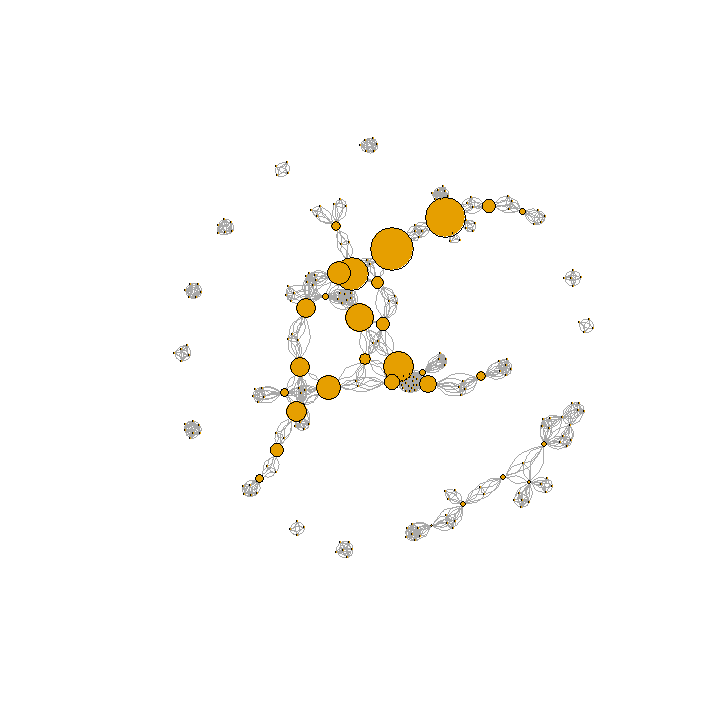

In [55]:
externe_2019_edge_list_name <- externe_2019 %>% select(Level, n_poste, Name) %>%
  inner_join(., select(., n_poste, Name), by = "n_poste") %>%
  rename(Name1 = Name.x, Name2 = Name.y) %>%
  filter(Name1 != Name2) %>%
  unique %>%
  arrange(n_poste)

externe_2019_matrix_name <- as.matrix(externe_2019_edge_list_name[c('Name1', 'Name2')]) 
graph_2019 <- graph_from_edgelist(externe_2019_matrix_name, directed = FALSE)
plot(graph_2019,vertex.label = NA, vertex.size = betweenness(graph_2019)*0.006)

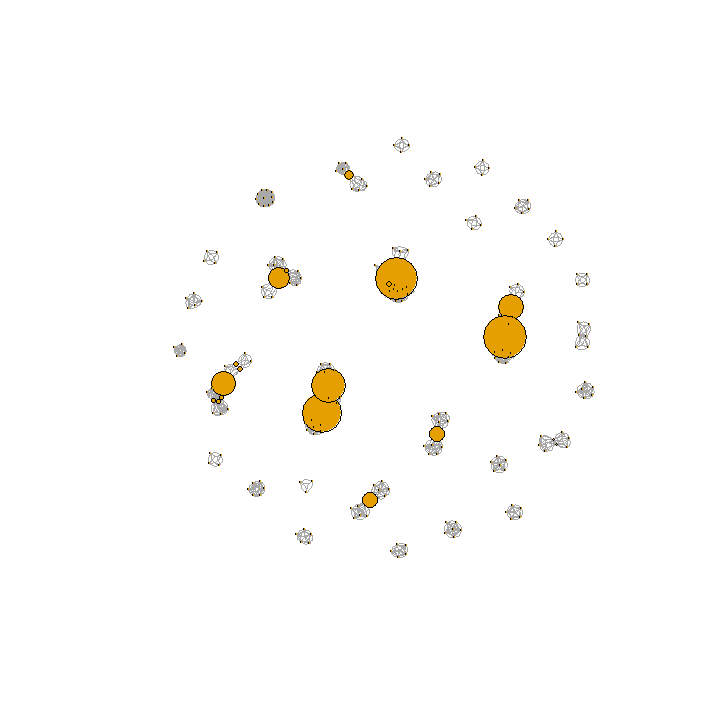

In [56]:
interne_2019_edge_list_name <- interne_2019 %>% select(Level, n_poste, Name) %>%
  inner_join(., select(., n_poste, Name), by = "n_poste") %>%
  rename(Name1 = Name.x, Name2 = Name.y) %>%
  filter(Name1 != Name2) %>%
  unique %>%
  arrange(n_poste)

interne_2019_matrix_name <- as.matrix(interne_2019_edge_list_name[c('Name1', 'Name2')]) 
graph_2019 <- graph_from_edgelist(interne_2019_matrix_name, directed = FALSE)
plot(graph_2019,vertex.label = NA, vertex.size = betweenness(graph_2019)*0.3)

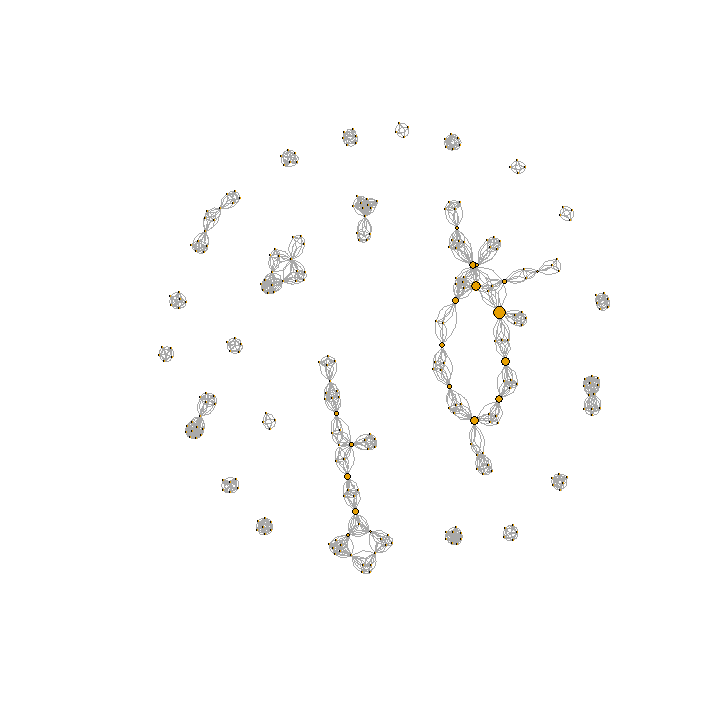

In [57]:
externe_2020_edge_list_name <- externe_2020 %>% select(Level, n_poste, Name) %>%
  inner_join(., select(., n_poste, Name), by = "n_poste") %>%
  rename(Name1 = Name.x, Name2 = Name.y) %>%
  filter(Name1 != Name2) %>%
  unique %>%
  arrange(n_poste)

externe_2020_matrix_name <- as.matrix(externe_2020_edge_list_name[c('Name1', 'Name2')]) 
graph_2020 <- graph_from_edgelist(externe_2020_matrix_name, directed = FALSE)
plot(graph_2020,vertex.label = NA,vertex.label = NA, vertex.size = betweenness(graph_2020)*0.006)

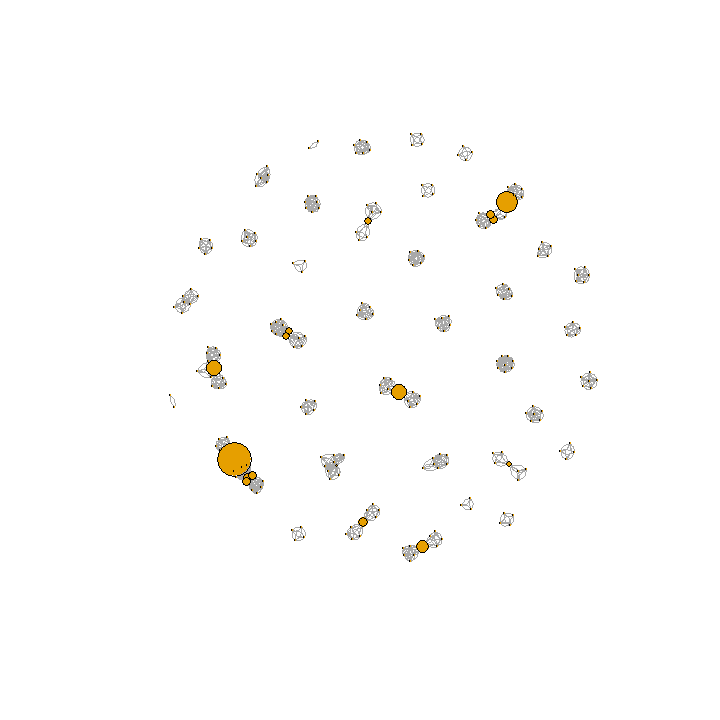

In [58]:
interne_2020_edge_list_name <- interne_2020 %>% select(Level, n_poste, Name) %>%
  inner_join(., select(., n_poste, Name), by = "n_poste") %>%
  rename(Name1 = Name.x, Name2 = Name.y) %>%
  filter(Name1 != Name2) %>%
  unique %>%
  arrange(n_poste)

interne_2020_matrix_name <- as.matrix(interne_2020_edge_list_name[c('Name1', 'Name2')]) 
graph_2020 <- graph_from_edgelist(interne_2020_matrix_name, directed = FALSE)
plot(graph_2020,vertex.label = NA, vertex.size = betweenness(graph_2020)*0.3)

# Strength

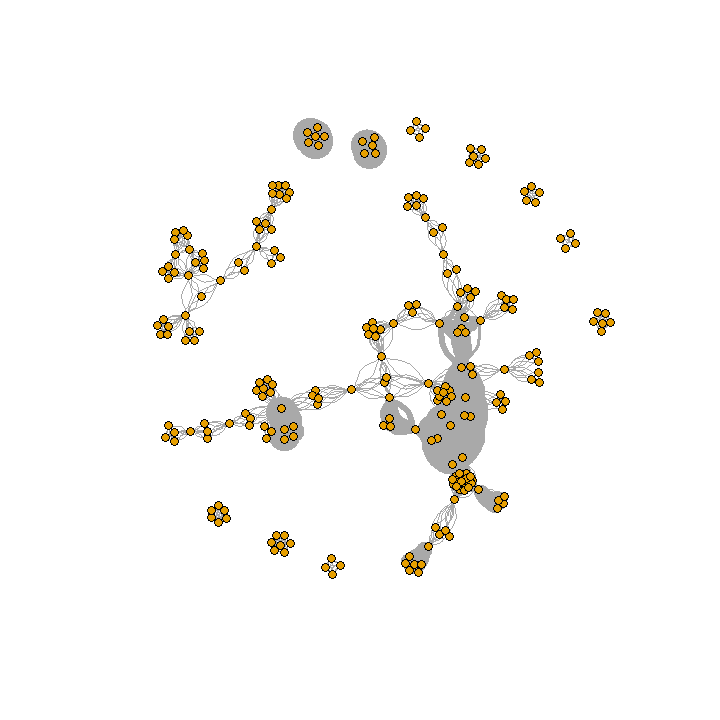

In [59]:
externe_2019_matrix_name <- as.matrix(externe_2019_edge_list_name[c('Name1', 'Name2')]) 
graph_2019 <- graph_from_edgelist(externe_2019_matrix_name, directed = FALSE)
plot(graph_2019,vertex.label = NA , vertex.size=4 ,edge.width= strength(graph_2019)*0.5)

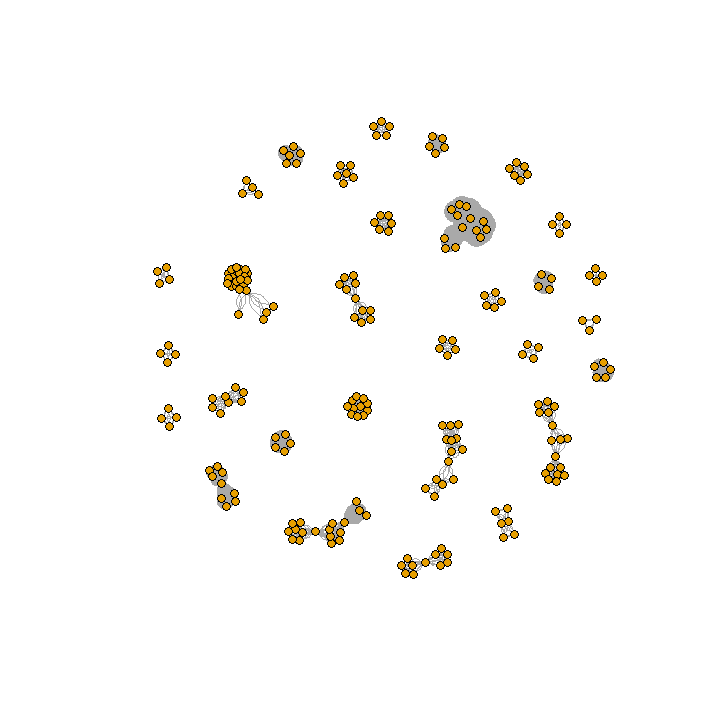

In [60]:
interne_2019_matrix_name <- as.matrix(interne_2019_edge_list_name[c('Name1', 'Name2')]) 
graph_2019 <- graph_from_edgelist(interne_2019_matrix_name, directed = FALSE)
plot(graph_2019,vertex.label = NA , vertex.size=4 ,edge.width= strength(graph_2019)*0.5)

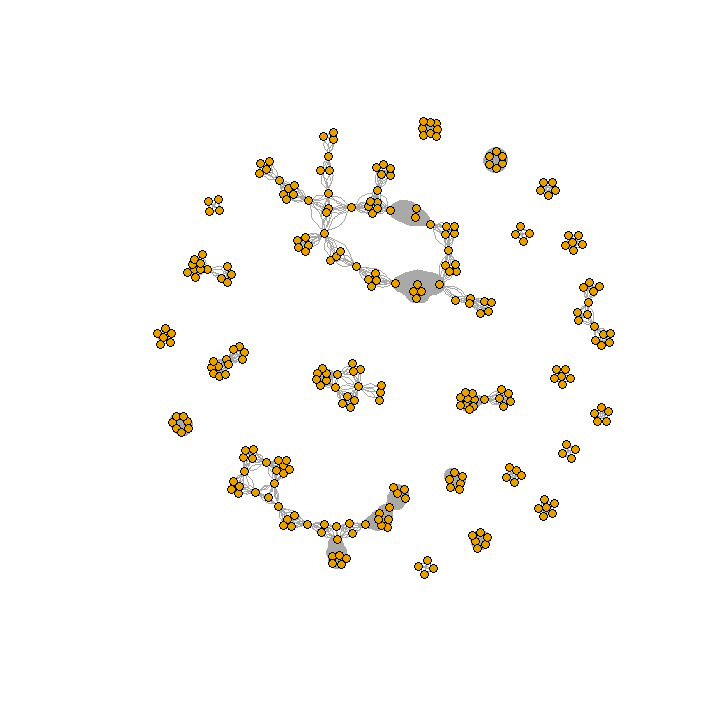

In [61]:
externe_2020_matrix_name <- as.matrix(externe_2020_edge_list_name[c('Name1', 'Name2')]) 
graph_2020 <- graph_from_edgelist(externe_2020_matrix_name, directed = FALSE)
plot(graph_2020,vertex.label = NA , vertex.size=4 ,edge.width= strength(graph_2020)*0.5)

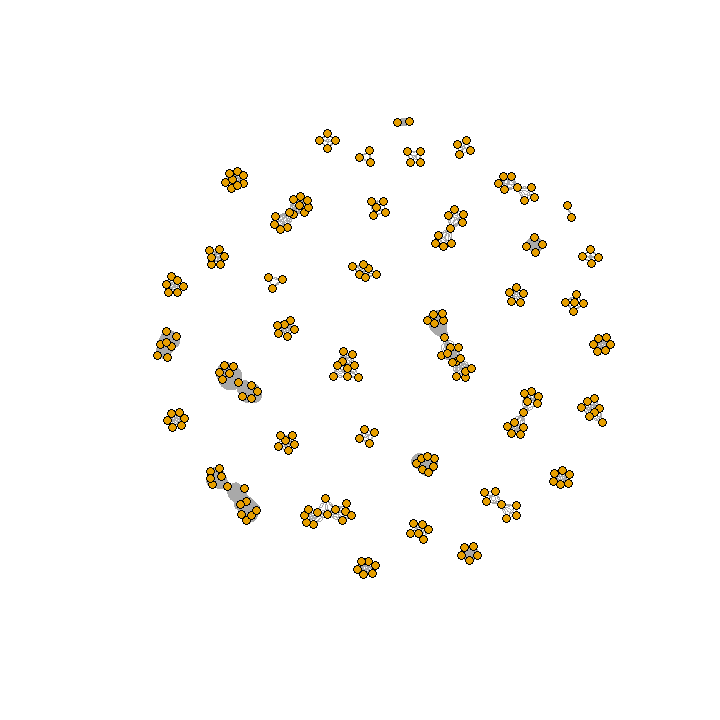

In [62]:
interne_2020_matrix_name <- as.matrix(interne_2020_edge_list_name[c('Name1', 'Name2')]) 
graph_2020 <- graph_from_edgelist(interne_2020_matrix_name, directed = FALSE)
plot(graph_2020,vertex.label = NA , vertex.size=4 ,edge.width= strength(graph_2020)*0.5)

# Eigen Centrality

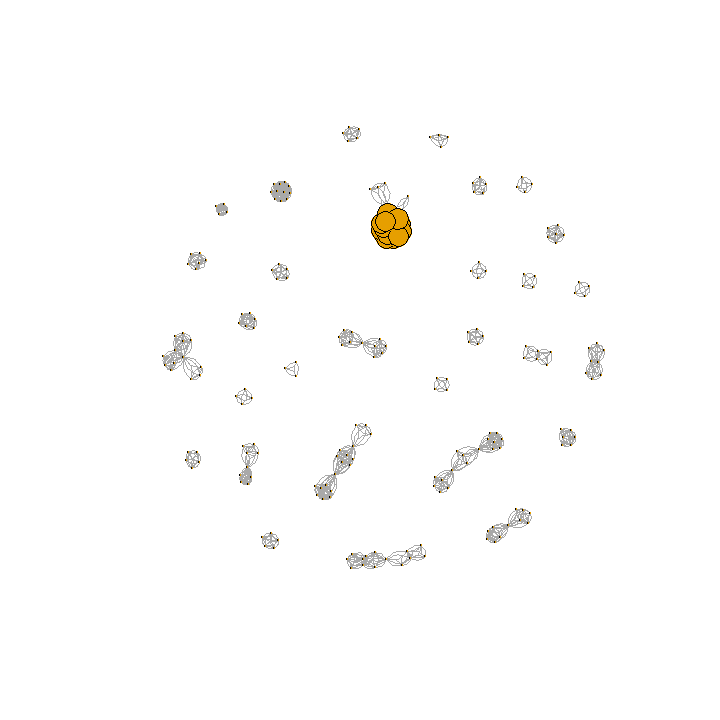

In [63]:
set.seed(20)

interne_19_matrix_name <- as.matrix(interne_2019_edge_list_name[c('Name1', 'Name2')]) 
graph_19 <- graph_from_edgelist(interne_19_matrix_name, directed = FALSE)
plot(graph_19,vertex.label = NA , vertex.size=evcent(graph_19)$vector*10)

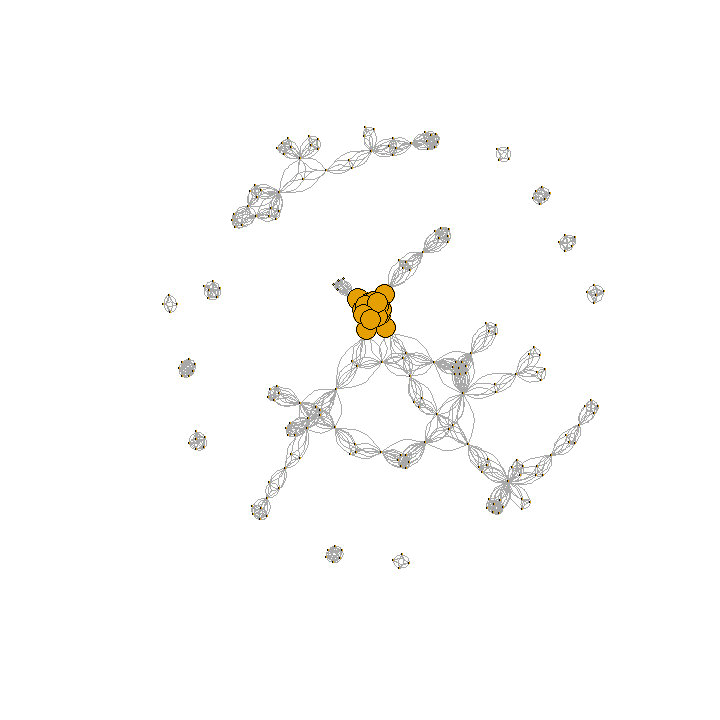

In [64]:
set.seed(20)

externe_19_matrix_name <- as.matrix(externe_2019_edge_list_name[c('Name1', 'Name2')]) 
graph_19 <- graph_from_edgelist(externe_19_matrix_name, directed = FALSE)
plot(graph_19,vertex.label = NA , vertex.size=evcent(graph_19)$vector*10)

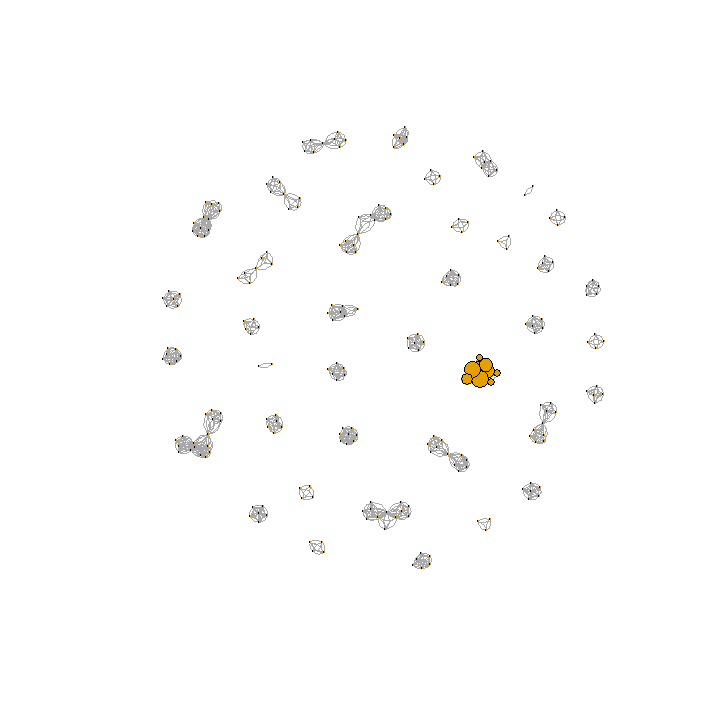

In [65]:
set.seed(20)
interne_2020_matrix_name <- as.matrix(interne_2020_edge_list_name[c('Name1', 'Name2')]) 
graph_2020 <- graph_from_edgelist(interne_2020_matrix_name, directed = FALSE)
plot(graph_2020,vertex.label = NA , vertex.size=evcent(graph_2020)$vector*10)

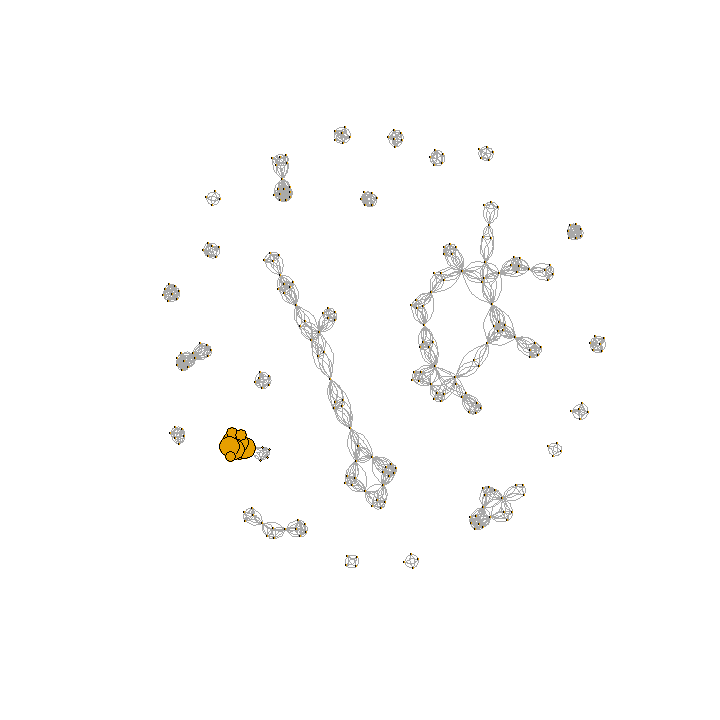

In [66]:
set.seed(20)

externe_20_matrix_name <- as.matrix(externe_2020_edge_list_name[c('Name1', 'Name2')]) 
graph_20 <- graph_from_edgelist(externe_20_matrix_name, directed = FALSE)
plot(graph_20,vertex.label = NA , vertex.size=evcent(graph_20)$vector*10)

In [116]:
links <- data.frame(
source = c("B2", "B2", "B2", "EX1", "B3", "B3"),
target = c("B3", "CY", "Wild", "B3", "B4", "EX2"),
value = c(12, 5, 1, 5, 13, 4)
)
nodes <- data.frame(name = c(as.character(links$source), as.character(links$target)) %>% unique())
links$ID.source <- match(links$source, nodes$name) - 1
links$ID.target <- match(links$target, nodes$name) - 1
p <- sankeyNetwork(Links = links, Nodes = nodes, Source = "ID.source", Target = "ID.target", Value = "value", NodeID = "name", sinksRight = FALSE,fontSize = 20)
p

HTML widgets cannot be represented in plain text (need html)

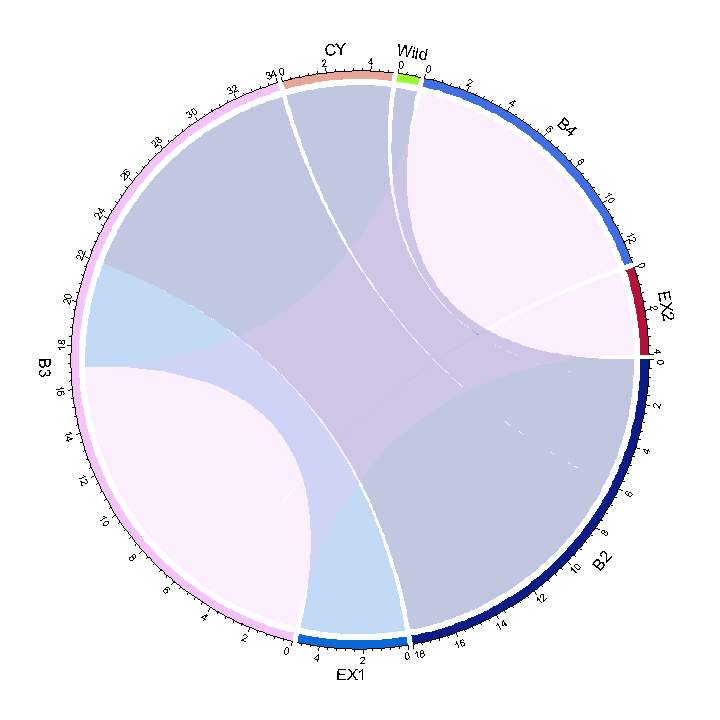

In [117]:
temp_graph <- graph.data.frame(links)
adjaceny.matrix <- get.adjacency(temp_graph, sparse = FALSE, attr= "value")



chordDiagram(adjaceny.matrix, transparency = 0.75)